<a href="https://colab.research.google.com/github/programmerChris3005/DAT512/blob/main/DAT_512_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 - 311 Data Forecast


### Importing API & Packages

In [1]:
pip install workalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.0 MB/s eta 0:00:00


In [2]:
pip install holidays


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
#importing packages

import requests
import pandas as pd
from datetime import datetime
import holidays

In [166]:
# Data Importation: Accessing the dataset via SODA API
# Importing the 311 Service Requests
uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json' # 311 Dataset
r = requests.get(uri)
print('Status code ', r.status_code)
print('Number of rows returned ', len(r.json()))
print('Encoded URI with params ' , r.url)

Status code  200
Number of rows returned  1000
Encoded URI with params  https://data.buffalony.gov/resource/whkc-e5vr.json


In [167]:
df=pd.DataFrame(r.json())
print(df.shape)
df.head()

(1000, 48)


,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_eziv_p4ck,:@computed_region_jdfw_hhbp,:@computed_region_urdz_b6n8,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm
0,1001804417,2023-03-06T10:47:00.000,2023-03-15T08:38:00.000,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,21,8,12,3,12,69,223,5,NaN,NaN
1,1001824819,2023-04-20T11:03:00.000,2023-04-26T08:08:00.000,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,22,3,12,3,18,83,8,9,NaN,NaN
2,508695-1001788285,2023-02-05T20:15:00.000,2023-02-15T08:38:00.000,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,34,8,10,1,35,75,245,2,NaN,NaN
3,1001804204,2023-03-03T15:29:00.000,NaN,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,15,17,8,4,17,28,31,5,Hagen St,NaN
4,1001803670,2023-03-01T15:01:00.000,2023-03-06T10:57:00.000,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,59,7,6,4,21,11,107,8,NaN,3


### Data Cleanup: Adjusting Data Types

In [168]:
# what are the data types
df.dtypes

case_reference                 object
open_date                      object
closed_date                    object
status                         object
subject                        object
reason                         object
type                           object
object_type                    object
address_number                 object
address_line_1                 object
city                           object
state                          object
zip_code                       object
property_id                    object
location                       object
latitude                       object
longitude                      object
council_district               object
police_district                object
census_tract                   object
census_block_group             object
census_block                   object
neighborhood                   object
x_coordinate                   object
y_coordinate                   object
census_tract_2010              object
census_block

In [169]:
#changing data types to appropriate type
df['open_date'] = pd.to_datetime(df['open_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])
df['open_date'].dt.date
df['closed_date'].dt.date

0      2023-03-15
1      2023-04-26
2      2023-02-15
3             NaT
4      2023-03-06
          ...    
995    2016-10-24
996    2023-01-03
997    2023-01-13
998    2023-01-13
999    2023-01-05
Name: closed_date, Length: 1000, dtype: object

In [8]:
df.dtypes

case_reference                         object
open_date                      datetime64[ns]
closed_date                    datetime64[ns]
status                                 object
subject                                object
reason                                 object
type                                   object
object_type                            object
address_line_1                         object
city                                   object
state                                  object
zip_code                               object
location                               object
latitude                               object
longitude                              object
council_district                       object
police_district                        object
census_tract                           object
census_block_group                     object
census_block                           object
neighborhood                           object
census_tract_2010                 

### Adding Columns

In [170]:
# ticket open
df['Year'] = pd.DatetimeIndex(df['open_date']).year # Year column
df['Month (Open)'] = pd.DatetimeIndex(df['open_date']).month # Month column
df['Day (Open)'] = pd.DatetimeIndex(df['open_date']).day # Day column

#ticket close
df['Year'] = pd.DatetimeIndex(df['closed_date']).year # Year column
df['Month (Closed)'] = pd.DatetimeIndex(df['closed_date']).month # Month column
df['Day (Closed)'] = pd.DatetimeIndex(df['closed_date']).day # Day column

# This column lists the duration of each ticket by Days
df['Ticket Duration'] = df['Day (Closed)'] - df['Day (Open)']

# Season the ticket was placed in
Winter = [12,1,2]
Spring = [3,4,5]
Summer = [6,7,8]
Autumn = [9,10,11]

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df['Season'] = df['Month (Open)'].apply(lambda x: season_dict[x])

# Holidays will play a factor in our forecast, lets create a column that lets us know whether a tickets date occurred on a holiday or not
# Initialize the US holidays library
us_holidays = holidays.UnitedStates()

# Add a new column 'IsHoliday' to indicate if a date is a US holiday
df['IsHoliday'] = df['open_date'].apply(lambda x: x in us_holidays)

#adding a coilumn with '1' for the count
df['count'] = 1
 



df.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_k9un_h6vm,Year,Month (Open),Day (Open),Month (Closed),Day (Closed),Ticket Duration,Season,IsHoliday,count
0,1001804417,2023-03-06 10:47:00,2023-03-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,NaN,2023.0,3,6,3.0,15.0,9.0,Spring,False,1
1,1001824819,2023-04-20 11:03:00,2023-04-26 08:08:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,NaN,2023.0,4,20,4.0,26.0,6.0,Spring,False,1
2,508695-1001788285,2023-02-05 20:15:00,2023-02-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,NaN,2023.0,2,5,2.0,15.0,10.0,Winter,False,1
3,1001804204,2023-03-03 15:29:00,NaT,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,NaN,NaN,3,3,NaN,NaN,NaN,Spring,False,1
4,1001803670,2023-03-01 15:01:00,2023-03-06 10:57:00,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,3,2023.0,3,1,3.0,6.0,5.0,Spring,False,1


##Frequency Analysis

In [171]:
#checking to see if the IsHoliday column works
print(df['IsHoliday'].value_counts())
holidayCheck = df[['open_date','IsHoliday']]
holidayCheck.head()

#(df['IsHoliday']=='True').sum()


False    976
True      24
Name: IsHoliday, dtype: int64


,open_date,IsHoliday
0,2023-03-06 10:47:00,False
1,2023-04-20 11:03:00,False
2,2023-02-05 20:15:00,False
3,2023-03-03 15:29:00,False
4,2023-03-01 15:01:00,False


In [172]:
# Reason count 
print(df['reason'].value_counts())

Sanitation                                 294
Housing                                    126
Engineering - Street Repairs                94
Streets                                     85
Parking Violations Bureau                   64
Forestry                                    59
Engineering - Traffic                       57
Police                                      49
Animal Shelter                              32
Rodent_Pest Control                         32
National Grid                               29
Freedom of Information                      19
Buffalo Sewer Authority                     16
Buffalo Water Authority                     10
BMHA                                        10
Streets/Sanitation                           6
Moving Violations                            5
Personnel                                    2
BFD                                          2
Administration                               2
City Parks                                   2
Citizens Serv

### Reasons Count

<Axes: title={'center': 'Reasons Count'}>

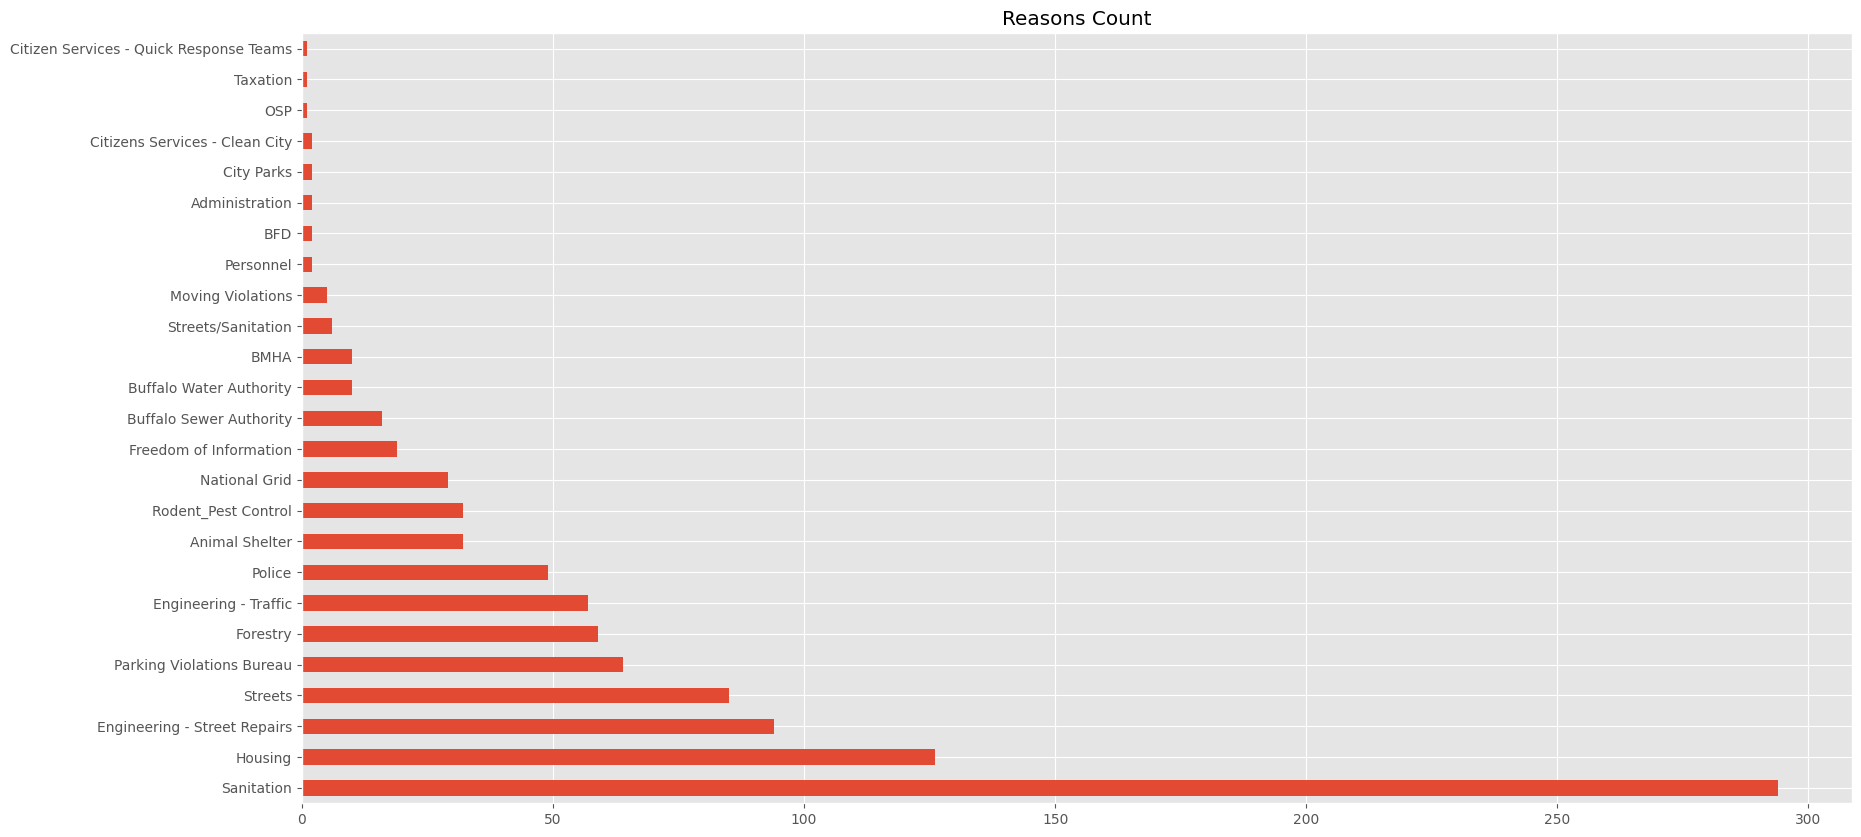

In [173]:
#bar chart
df['reason'].value_counts()[:30].plot(kind='barh', title = 'Reasons Count')

In [174]:
# Frequency of Tickets during seasons

print(df['Season'].value_counts())

Winter    542
Spring    421
Fall       23
Summer     14
Name: Season, dtype: int64


### Number of Tickets per Season

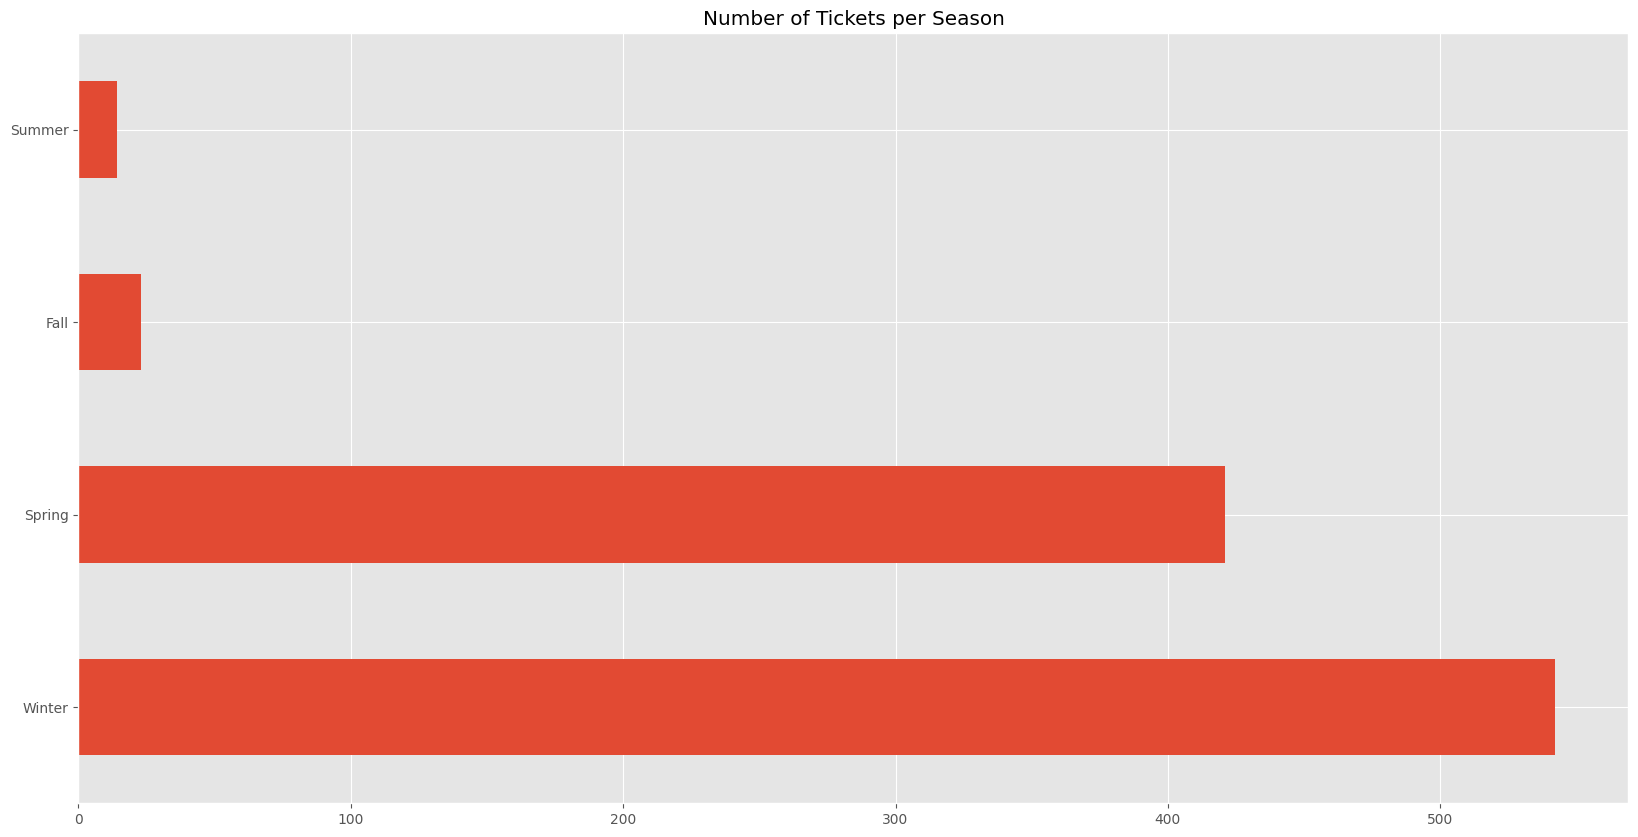

In [175]:
from pandas.core.series import fmt
# bar chart

ax = df['Season'].value_counts()[:30].plot(kind='barh', title = 'Number of Tickets per Season')


In [ ]:
## this gives the specific count of a '' in a column
#(df['Season'] =='Summer').sum()

In [ ]:
# trying to experiment
'''
# importing library
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))
        
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = ["Summer", "Fall",
         "Spring", "Winter"]
    y = [(df['Season'] =='Summer').sum(),(df['Season'] =='Fall').sum(),(df['Season'] =='Winter').sum(),(df['Season'] =='Spring').sum()]
     
    # setting figure size by using figure() function
    plt.figure(figsize = (10,5))
     
    # making the bar chart on the data
    plt.bar(x, y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Number of Tickets per Season")
     
    # giving X and Y labels
    plt.xlabel("Ticket Count")
    plt.ylabel('Season')
     
    # visualizing the plot
    plt.show()
  '''

'\n# importing library\nimport matplotlib.pyplot as plt\n\n# function to add value labels\ndef addlabels(x,y):\n    for i in range(len(x)):\n        plt.text(i, y[i], y[i], ha = \'center\',\n                 Bbox = dict(facecolor = \'red\', alpha =.8))\n        \nif __name__ == \'__main__\':\n   \n    # creating data on which bar chart will be plot\n    x = ["Summer", "Fall",\n         "Spring", "Winter"]\n    y = [(df[\'Season\'] ==\'Summer\').sum(),(df[\'Season\'] ==\'Fall\').sum(),(df[\'Season\'] ==\'Winter\').sum(),(df[\'Season\'] ==\'Spring\').sum()]\n     \n    # setting figure size by using figure() function\n    plt.figure(figsize = (10,5))\n     \n    # making the bar chart on the data\n    plt.bar(x, y)\n     \n    # calling the function to add value labels\n    addlabels(x, y)\n     \n    # giving title to the plot\n    plt.title("Number of Tickets per Season")\n     \n    # giving X and Y labels\n    plt.xlabel("Ticket Count")\n    plt.ylabel(\'Season\')\n     \n    # visua

## Where are these tickets coming from?

Download the packages

In [31]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
pip install plotly_express==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
pip show plotly

Name: plotly
Version: 5.13.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: tenacity
Required-by: cufflinks, datascience, plotly-express


In [35]:
pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#import the goodies
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [39]:
#pulling in the location columns to see where the tickets are being placed from  

locations = df[['latitude','longitude','address_line_1','zip_code']]
locations.head()

,latitude,longitude,address_line_1,zip_code
0,42.856463120634494,-78.83034407693124,KIRKPATRICK,14220
1,42.89583412887019,-78.8247421339197,BROADWAY,14212
2,42.91232235456432,-78.83024971030892,GLENWOOD,14211
3,42.94492544877188,-78.81613193511131,LA SALLE,14215
4,42.89950364149294,-78.86091335961936,MULBERRY,14204


In [43]:
# how many tickets per zip code
## maybe this will make for a better visualization for our map

locations2 = locations['zip_code'].value_counts()
locations2.head()

14215    123
14220    122
14213     88
14207     85
14211     80
Name: zip_code, dtype: int64

## Status Visulazation

In [44]:
print(df['status'].value_counts())

Closed    944
Open       56
Name: status, dtype: int64


Text(0.5, 1.0, 'Ratio of Open & Closed Tickets')

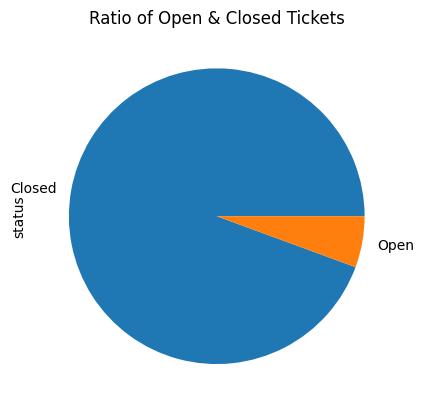

In [45]:
# Pie chart showing the ratio of closed tickets vs open
pieChart = df['status'].value_counts()[:2].plot(kind='pie')
pieChart.set_title("Ratio of Open & Closed Tickets")

In [46]:
#percentage of closed and open

closedSum = (df['status'] =='Closed').sum()
print('Number of Closed Tickets: ',closedSum,)
openSum = (df['status'] =='Open').sum()
print('Number of Open Tickets: ',openSum)

closedSumPercent = (closedSum/(closedSum+openSum))*100
print('Percentage of Closed Tickets: ',closedSumPercent,"%")

openSumPercent = (openSum/(closedSum+openSum))*100
print('Percentage of Open Tickets:',openSumPercent,'%')


#get the time span (year will be fine)
print('Start of data set: ',df['Year'].min()) # this is when the 311 data starts
print('End of data set: ',df['Year'].max()) # this is when the 311 data ends

timeFrame = df['Year'].max() - df['Year'].min() # of Years the data spans
print(timeFrame,'year timeframe')

Number of Closed Tickets:  944
Number of Open Tickets:  56
Percentage of Closed Tickets:  94.39999999999999 %
Percentage of Open Tickets: 5.6000000000000005 %
Start of data set:  2022.0
End of data set:  2023.0
1.0 year timeframe


In [47]:
print('Within a',timeFrame,'yr timeframe, ',closedSumPercent,'% of tickets were complete.')

Within a 1.0 yr timeframe,  94.39999999999999 % of tickets were complete.


## Forecasting!

In [48]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from prophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [177]:
df.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_k9un_h6vm,Year,Month (Open),Day (Open),Month (Closed),Day (Closed),Ticket Duration,Season,IsHoliday,count
0,1001804417,2023-03-06 10:47:00,2023-03-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,NaN,2023.0,3,6,3.0,15.0,9.0,Spring,False,1
1,1001824819,2023-04-20 11:03:00,2023-04-26 08:08:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,NaN,2023.0,4,20,4.0,26.0,6.0,Spring,False,1
2,508695-1001788285,2023-02-05 20:15:00,2023-02-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,NaN,2023.0,2,5,2.0,15.0,10.0,Winter,False,1
3,1001804204,2023-03-03 15:29:00,NaT,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,NaN,NaN,3,3,NaN,NaN,NaN,Spring,False,1
4,1001803670,2023-03-01 15:01:00,2023-03-06 10:57:00,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,3,2023.0,3,1,3.0,6.0,5.0,Spring,False,1


In [178]:
df.tail()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_k9un_h6vm,Year,Month (Open),Day (Open),Month (Closed),Day (Closed),Ticket Duration,Season,IsHoliday,count
995,1000605793,2016-10-17 12:25:00,2016-10-24 09:14:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Street,NaN,AMHERST ST,...,NaN,2016.0,10,17,10.0,24.0,7.0,Fall,False,1
996,1001759925,2022-12-30 11:49:00,2023-01-03 11:06:00,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,516,WINSLOW,...,NaN,2023.0,12,30,1.0,3.0,-27.0,Winter,False,1
997,1001762917,2023-01-09 10:31:00,2023-01-13 22:05:00,Closed,Dept of Public Works,Forestry,Fallen Tree Inspection (Req_Serv),Property,387,OKELL,...,NaN,2023.0,1,9,1.0,13.0,4.0,Winter,False,1
998,1001753314,2022-12-13 09:27:00,2023-01-13 08:26:00,Closed,Dept of Public Works,Engineering - Street Repairs,PW Ongoing Construction (Req_Serv),Property,831,EAGLE EAST,...,NaN,2023.0,12,13,1.0,13.0,0.0,Winter,False,1
999,1001761021,2023-01-03 17:20:00,2023-01-05 12:46:00,Closed,Dept of Law,Freedom of Information,FOIL Records Fire Dept (Req_Serv),Unknown,Unknown,Unknown,...,NaN,2023.0,1,3,1.0,5.0,2.0,Winter,False,1


## Preparing for Prophet

In [52]:
# need to change the names of the columns to 'ds' and 'y'
# create a new df and keep the old one

In [179]:
# first, lets view the number of tickets on each date
dateCount = df['open_date'].value_counts()
dateCount.head()

2023-02-10 08:42:00    2
2022-07-22 14:46:00    2
2023-05-01 10:30:00    2
2023-04-27 10:45:00    2
2023-04-17 14:38:00    2
Name: open_date, dtype: int64

In [180]:
# I don't like the time appearing along with the date for open_date & closed_date... going to strip them
## future ref: work through formatting all columns initially 

df['open_dt']=pd.to_datetime(df['open_date'])
#df['open_date']=pd.to_datetime(df['open_date']).dt.date # open_date column
#df['closed_date']=pd.to_datetime(df['closed_date']).dt.date #closed_date column
df.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,Year,Month (Open),Day (Open),Month (Closed),Day (Closed),Ticket Duration,Season,IsHoliday,count,open_dt
0,1001804417,2023-03-06 10:47:00,2023-03-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,2023.0,3,6,3.0,15.0,9.0,Spring,False,1,2023-03-06 10:47:00
1,1001824819,2023-04-20 11:03:00,2023-04-26 08:08:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,2023.0,4,20,4.0,26.0,6.0,Spring,False,1,2023-04-20 11:03:00
2,508695-1001788285,2023-02-05 20:15:00,2023-02-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,2023.0,2,5,2.0,15.0,10.0,Winter,False,1,2023-02-05 20:15:00
3,1001804204,2023-03-03 15:29:00,NaT,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,NaN,3,3,NaN,NaN,NaN,Spring,False,1,2023-03-03 15:29:00
4,1001803670,2023-03-01 15:01:00,2023-03-06 10:57:00,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,2023.0,3,1,3.0,6.0,5.0,Spring,False,1,2023-03-01 15:01:00


## These are the historical number of tickets on a date basis

In [181]:
# re run the amount of tickets on a date basis
dateCount = df['open_date'].value_counts()
dateCount.head()

2023-02-10 08:42:00    2
2022-07-22 14:46:00    2
2023-05-01 10:30:00    2
2023-04-27 10:45:00    2
2023-04-17 14:38:00    2
Name: open_date, dtype: int64

In [182]:
# copy of dataframe
df2 = df.copy()
df2.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,Year,Month (Open),Day (Open),Month (Closed),Day (Closed),Ticket Duration,Season,IsHoliday,count,open_dt
0,1001804417,2023-03-06 10:47:00,2023-03-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,2023.0,3,6,3.0,15.0,9.0,Spring,False,1,2023-03-06 10:47:00
1,1001824819,2023-04-20 11:03:00,2023-04-26 08:08:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,2023.0,4,20,4.0,26.0,6.0,Spring,False,1,2023-04-20 11:03:00
2,508695-1001788285,2023-02-05 20:15:00,2023-02-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,2023.0,2,5,2.0,15.0,10.0,Winter,False,1,2023-02-05 20:15:00
3,1001804204,2023-03-03 15:29:00,NaT,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,NaN,3,3,NaN,NaN,NaN,Spring,False,1,2023-03-03 15:29:00
4,1001803670,2023-03-01 15:01:00,2023-03-06 10:57:00,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,2023.0,3,1,3.0,6.0,5.0,Spring,False,1,2023-03-01 15:01:00


In [183]:
dateCount2 = df2['open_date'].value_counts()
dateCount2.head()
# having difficulty trying to make the ds and y because the value counts is giving NaN

2023-02-10 08:42:00    2
2022-07-22 14:46:00    2
2023-05-01 10:30:00    2
2023-04-27 10:45:00    2
2023-04-17 14:38:00    2
Name: open_date, dtype: int64

In [184]:
dateCount2 = df2[['open_dt','count']]
dateCount2.head()

,open_dt,count
0,2023-03-06 10:47:00,1
1,2023-04-20 11:03:00,1
2,2023-02-05 20:15:00,1
3,2023-03-03 15:29:00,1
4,2023-03-01 15:01:00,1


In [190]:
dateCount2['open_dt'] = pd.to_datetime(dateCount2['open_dt']).dt.strftime('%Y-%m-%d')
dateCount2.head()

<ipython-input-190-3dc07afb461c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateCount2['open_dt'] = pd.to_datetime(dateCount2['open_dt']).dt.strftime('%Y-%m-%d')


,open_dt,count
0,2023-03-06,1
1,2023-04-20,1
2,2023-02-05,1
3,2023-03-03,1
4,2023-03-01,1


In [191]:
dateCount3 = dateCount2.groupby(['open_dt']).count().reset_index()

In [192]:
dateCount2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   open_dt  1000 non-null   object
 1   count    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [193]:
dateCount3['open_dt'] = pd.to_datetime(dateCount3['open_dt'])

In [194]:
dateCount3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   open_dt  184 non-null    datetime64[ns]
 1   count    184 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [197]:
dateCount3 = dateCount3.set_index('open_dt')

In [198]:
dateCount3.head()

,count
open_dt,
2016-10-17,1
2016-10-19,1
2018-02-16,1
2020-09-15,1
2021-02-09,1


In [233]:
#  convert to datetime type
dateCount3['open_dt'] = pd.to_datetime(dateCount3['open_dt'])

In [234]:
#Forecast Rule --- time period we end on
endDate = pd.to_datetime('2022-12-31')

dateCount3 = dateCount3[dateCount3['open_dt'] <= endDate]

In [283]:
#converting to 'ds' and 'y' for the prophet model
dateCount3 = dateCount3.rename(columns={'open_dt':'ds', 'count':'y'})
dateCount3.head()

,ds,y
0,2016-10-17,1
1,2016-10-19,1
2,2018-02-16,1
3,2020-09-15,1
4,2021-02-09,1


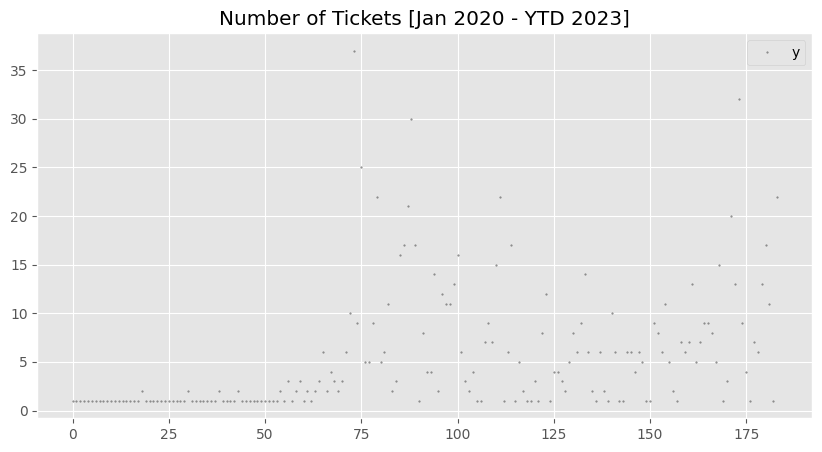

In [250]:
import seaborn as sns

color_pal = sns.color_palette()
dateCount3.plot(style='.',
         figsize=(10,5),
         ms=1,
         color = color_pal[3],
         title='Number of Tickets [Jan 2020 - YTD 2023]')
plt.show()

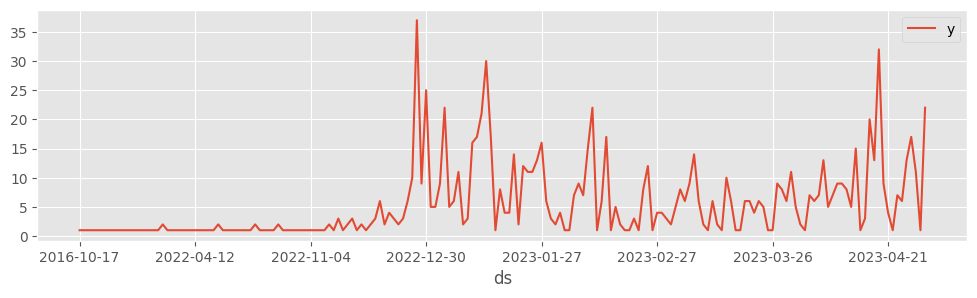

In [251]:
ax = dateCount3.plot(x='ds', y='y', kind='line', figsize = (12,3))
plt.show()

In [252]:
dateCount3 = dateCount2.groupby(['open_dt']).count().reset_index()

In [253]:
dateCount3.head()

,open_dt,count
0,2016-10-17,1
1,2016-10-19,1
2,2018-02-16,1
3,2020-09-15,1
4,2021-02-09,1


In [254]:
dateCount3 = dateCount3.rename(columns={'open_dt':'ds', 'count':'y'})
dateCount3.head()

,ds,y
0,2016-10-17,1
1,2016-10-19,1
2,2018-02-16,1
3,2020-09-15,1
4,2021-02-09,1


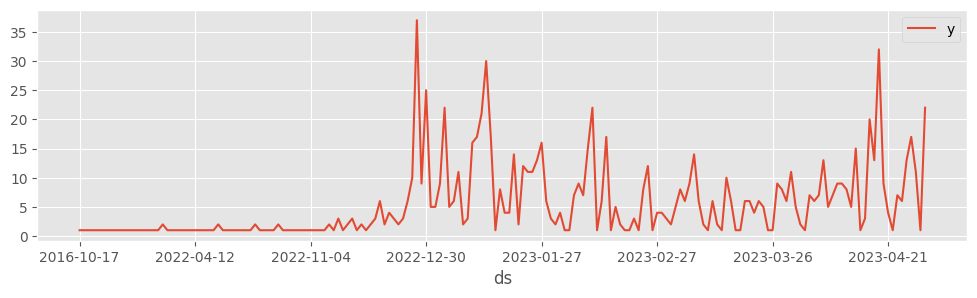

In [256]:
ax = dateCount3.plot(x='ds', y='y', kind='line', figsize = (12,3))
plt.show()

In [258]:
lastDate = dateCount3['ds'].max()
print(lastDate)

2023-05-01


In [259]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [247]:
import prophet as Prophet

In [260]:
# This instantiates the forecasting model
model = Prophet.Prophet()

# This fits the model into the specific dataframe
model.fit(dateCount3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6l0yg3w/4ys7h5s6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6l0yg3w/dn2c1mck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10816', 'data', 'file=/tmp/tmpk6l0yg3w/4ys7h5s6.json', 'init=/tmp/tmpk6l0yg3w/dn2c1mck.json', 'output', 'file=/tmp/tmpk6l0yg3w/prophet_modeljxl1nify/prophet_model-20230511020006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [261]:
type(model)

prophet.forecaster.Prophet

In [262]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
203,2024-12-31
204,2025-01-31
205,2025-02-28
206,2025-03-31
207,2025-04-30


In [263]:
forecast = model.predict(future)

In [264]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-10-17,-7.310867,-10.989527,1.662251,-7.310867,-7.310867,2.506835,2.506835,2.506835,2.326511,2.326511,2.326511,0.180324,0.180324,0.180324,0.0,0.0,0.0,-4.804032
1,2016-10-19,-7.301896,-11.308901,0.884251,-7.301896,-7.301896,2.051323,2.051323,2.051323,2.153596,2.153596,2.153596,-0.102273,-0.102273,-0.102273,0.0,0.0,0.0,-5.250573
2,2018-02-16,-5.126507,-7.083162,5.611237,-5.126507,-5.126507,4.062899,4.062899,4.062899,2.167723,2.167723,2.167723,1.895176,1.895176,1.895176,0.0,0.0,0.0,-1.063608
3,2020-09-15,-0.901317,-7.841053,4.037029,-0.901317,-0.901317,-0.764588,-0.764588,-0.764588,0.786652,0.786652,0.786652,-1.551240,-1.551240,-1.551240,0.0,0.0,0.0,-1.665905
4,2021-02-09,-0.241972,-2.436139,9.553140,-0.241972,-0.241972,3.840029,3.840029,3.840029,0.786652,0.786652,0.786652,3.053376,3.053376,3.053376,0.0,0.0,0.0,3.598057


In [265]:
forecast.tail().T

,203,204,205,206,207
ds,2024-12-31 00:00:00,2025-01-31 00:00:00,2025-02-28 00:00:00,2025-03-31 00:00:00,2025-04-30 00:00:00
trend,6.131711,6.270757,6.396347,6.535393,6.669953
yhat_lower,9.308064,5.127945,2.248062,3.760746,7.092839
yhat_upper,22.031625,17.268936,14.923183,16.763788,19.143864
trend_lower,6.13171,6.270755,6.396345,6.535391,6.669952
trend_upper,6.131712,6.270758,6.396348,6.535394,6.669955
additive_terms,9.637495,5.201634,1.934458,3.713145,6.409986
additive_terms_lower,9.637495,5.201634,1.934458,3.713145,6.409986
additive_terms_upper,9.637495,5.201634,1.934458,3.713145,6.409986
weekly,0.786652,2.167723,2.167723,2.326511,2.153596


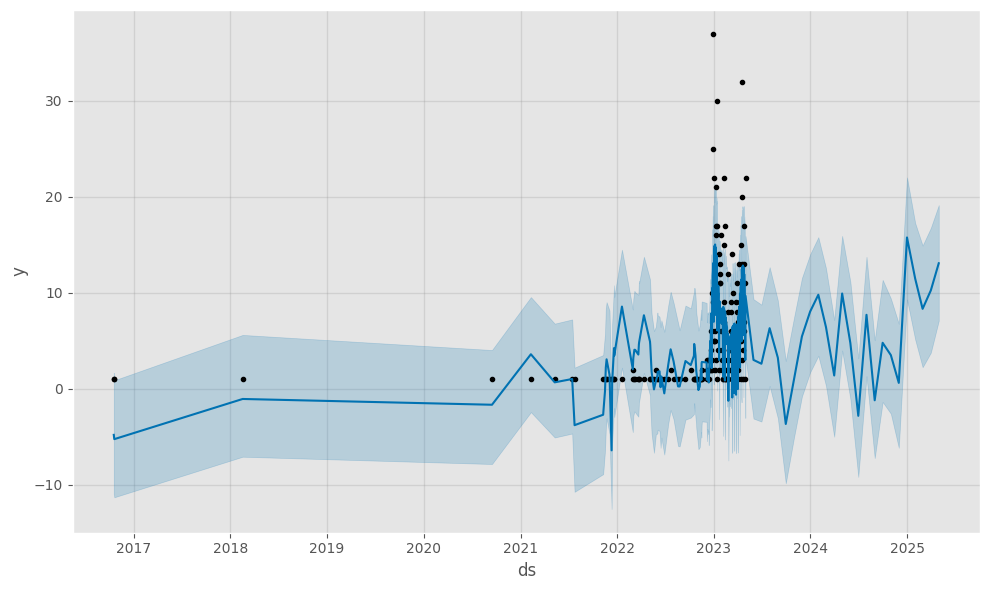

In [266]:
model.plot(forecast);

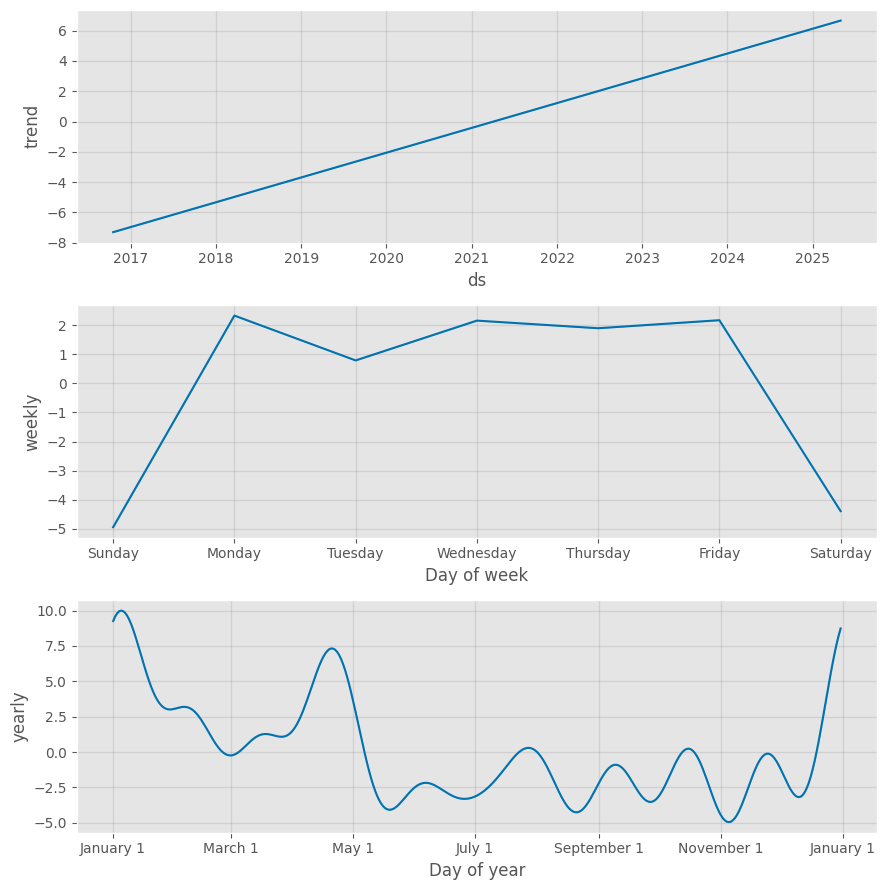

In [267]:
model.plot_components(forecast);

In [284]:
us_holidays = holidays.US() #including the holidays 

AttributeError: ignored

In [269]:
df['is_holiday'] = df['open_date'].apply(lambda x: x in us_holidays)
df.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,Month (Open),Day (Open),Month (Closed),Day (Closed),Ticket Duration,Season,IsHoliday,count,open_dt,is_holiday
0,1001804417,2023-03-06 10:47:00,2023-03-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,3,6,3.0,15.0,9.0,Spring,False,1,2023-03-06 10:47:00,False
1,1001824819,2023-04-20 11:03:00,2023-04-26 08:08:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,4,20,4.0,26.0,6.0,Spring,False,1,2023-04-20 11:03:00,False
2,508695-1001788285,2023-02-05 20:15:00,2023-02-15 08:38:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,2,5,2.0,15.0,10.0,Winter,False,1,2023-02-05 20:15:00,False
3,1001804204,2023-03-03 15:29:00,NaT,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,3,3,NaN,NaN,NaN,Spring,False,1,2023-03-03 15:29:00,False
4,1001803670,2023-03-01 15:01:00,2023-03-06 10:57:00,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,3,1,3.0,6.0,5.0,Spring,False,1,2023-03-01 15:01:00,False


In [270]:
print(df['is_holiday'].value_counts())
holidayCheck = df[['open_date', 'is_holiday']]
holidayCheck.head()
(df['is_holiday'] == 'true').sum()

False    976
True      24
Name: is_holiday, dtype: int64


0

In [271]:
df_hols = df[['open_dt', 'count', 'is_holiday']]
df_hols['open_dt'] = pd.to_datetime(df_hols['open_dt']).dt.strftime('%Y-%m-%d')
df_hols.head()

<ipython-input-271-7b4f6667967a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hols['open_dt'] = pd.to_datetime(df_hols['open_dt']).dt.strftime('%Y-%m-%d')


,open_dt,count,is_holiday
0,2023-03-06,1,False
1,2023-04-20,1,False
2,2023-02-05,1,False
3,2023-03-03,1,False
4,2023-03-01,1,False


In [272]:
df_hols = df_hols[df_hols['is_holiday'] == True]

In [273]:
df_hols.head()

,open_dt,count,is_holiday
23,2022-12-26,1,True
47,2022-12-25,1,True
139,2023-01-02,1,True
150,2022-12-25,1,True
167,2022-12-26,1,True


In [274]:
df_hols = df_hols.rename(columns={'open_dt':'ds', 'count':'y'})
df_hols.head()

,ds,y,is_holiday
23,2022-12-26,1,True
47,2022-12-25,1,True
139,2023-01-02,1,True
150,2022-12-25,1,True
167,2022-12-26,1,True


In [275]:
import holidays
us_holidays = holidays.UnitedStates(years = [2020,2021,2022]) 

holidays = pd.DataFrame({
    'holiday': us_holidays.values(),
    'ds': us_holidays.keys(),
    'lower_window': 0,
    'upper_window': 0, })  
holidays

,holiday,ds,lower_window,upper_window
0,New Year's Day,2020-01-01,0,0
1,Martin Luther King Jr. Day,2020-01-20,0,0
2,Washington's Birthday,2020-02-17,0,0
3,Memorial Day,2020-05-25,0,0
4,Independence Day,2020-07-04,0,0
5,Independence Day (Observed),2020-07-03,0,0
6,Labor Day,2020-09-07,0,0
7,Columbus Day,2020-10-12,0,0
8,Veterans Day,2020-11-11,0,0
9,Thanksgiving,2020-11-26,0,0


In [277]:
model2 = Prophet.Prophet(holidays=holidays,
                weekly_seasonality=False)

# model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model2.fit(dateCount3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6l0yg3w/vbekp88e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6l0yg3w/mdk2j3sh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93127', 'data', 'file=/tmp/tmpk6l0yg3w/vbekp88e.json', 'init=/tmp/tmpk6l0yg3w/mdk2j3sh.json', 'output', 'file=/tmp/tmpk6l0yg3w/prophet_modelxy6q92ag/prophet_model-20230511022354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [278]:
future2 = model2.make_future_dataframe(periods=24, freq = 'm')
future2.tail()

#... and then run our future data through prophet's model
forecast2 = model2.predict(future)

forecast2.head().T

,0,1,2,3,4
ds,2016-10-17 00:00:00,2016-10-19 00:00:00,2018-02-16 00:00:00,2020-09-15 00:00:00,2021-02-09 00:00:00
trend,-6.777512,-6.767892,-4.435087,0.095845,0.802901
yhat_lower,-12.854105,-13.382304,-9.907629,-8.232966,-3.640811
yhat_upper,0.428823,0.260223,3.448246,5.309633,9.696405
trend_lower,-6.777512,-6.767892,-4.435087,0.095845,0.802901
...,...,...,...,...,...
yearly_upper,1.013788,0.643171,1.574753,-1.612456,2.521612
multiplicative_terms,0.0,0.0,0.0,0.0,0.0
multiplicative_terms_lower,0.0,0.0,0.0,0.0,0.0
multiplicative_terms_upper,0.0,0.0,0.0,0.0,0.0


In [279]:
future2['ds'] = future2['ds'].to_numpy().astype('datetime64[M]')

In [280]:
#while our new df contains a bit of data, we only care about a few features...
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
203,2024-12-31,15.086706,8.344804,22.151058
204,2025-01-31,10.616331,3.846314,17.761042
205,2025-02-28,7.855506,1.210315,14.834344
206,2025-03-31,8.472121,1.432039,15.008166
207,2025-04-30,12.067624,5.272724,19.095876


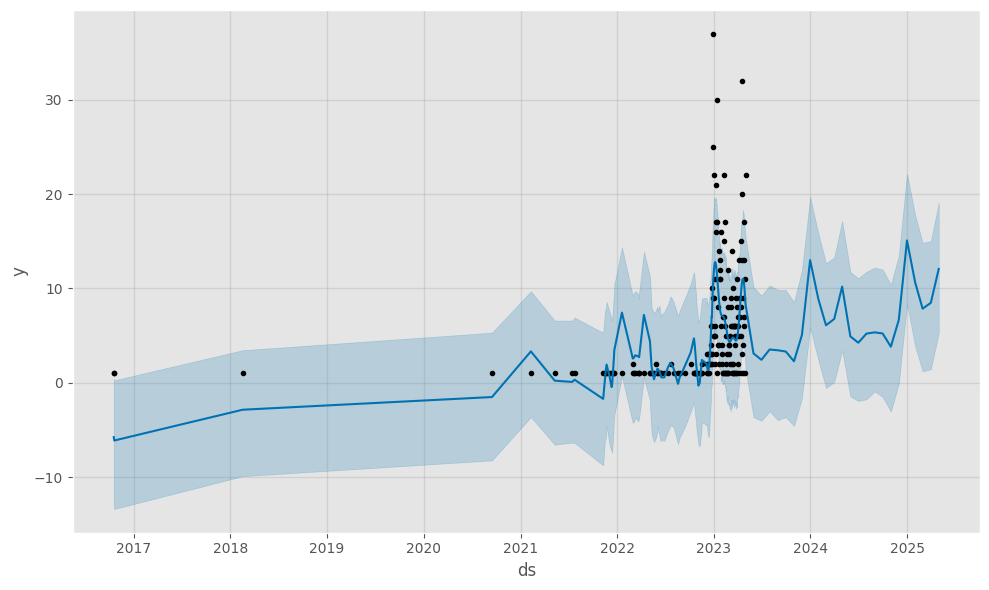

In [281]:
model2.plot(forecast2);

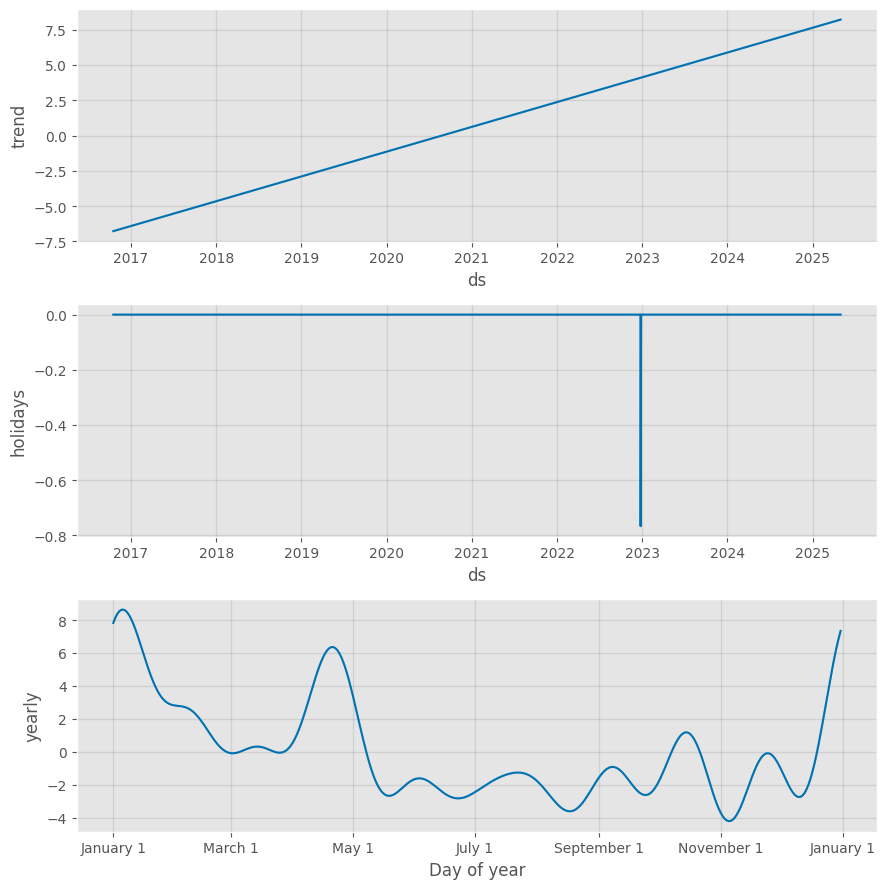

In [282]:
model2.plot_components(forecast2);